# EXPLORATORY DATA ANALYSIS

## Import the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud, STOPWORDS 
plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../World Food Facts'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.options.mode.chained_assignment = None # Warning for chained copies disabled

../World Food Facts\Diet_products_kmeans_clustering.ipynb
../World Food Facts\en.openfoodfacts.org.products.tsv
../World Food Facts\Exercises_with_solutions.ipynb
../World Food Facts\Open_food_facts_exercise.ipynb
../World Food Facts\Open_food_facts_exercise2.ipynb
../World Food Facts\Solutions.ipynb
../World Food Facts\.ipynb_checkpoints\Diet_products_kmeans_clustering-checkpoint.ipynb
../World Food Facts\.ipynb_checkpoints\Exercises_with_solutions-checkpoint.ipynb
../World Food Facts\.ipynb_checkpoints\Open_food_facts_exercise-checkpoint.ipynb
../World Food Facts\.ipynb_checkpoints\Open_food_facts_exercise2-checkpoint.ipynb


## Load data

In [2]:
a = pd.read_csv("en.openfoodfacts.org.products.tsv", delimiter='\t', encoding='utf-8')
a['countries_en'].head(10)

c:\users\zhha8003\jupyter-env\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0           France
1    United States
2    United States
3    United States
4    United States
5    United States
6    United States
7    United States
8    United States
9    United States
Name: countries_en, dtype: object

## Clean data

In [3]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

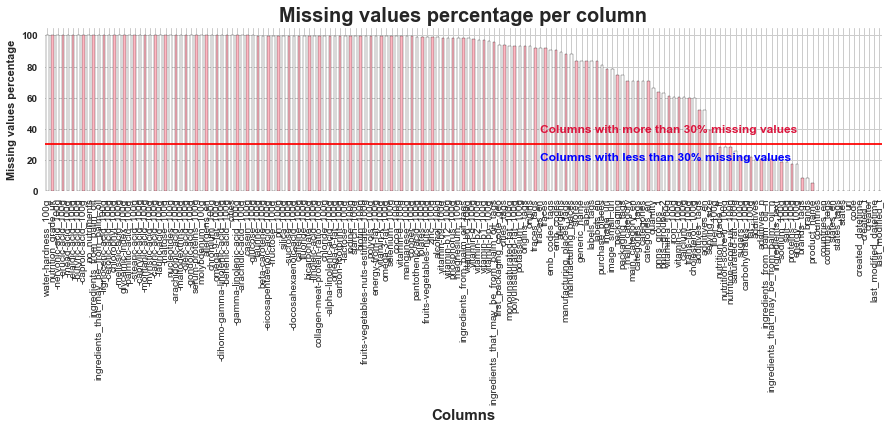

In [4]:
msv1(a,30, color=('white', 'lightpink'))

In [5]:
ab=a.dropna(thresh=106800, axis=1)
print(f"Data shape before cleaning {a.shape}")
print(f"Data shape after cleaning {ab.shape}")
print(f"We dropped {a.shape[1]- ab.shape[1]} columns")

Data shape before cleaning (356027, 163)
Data shape after cleaning (356027, 45)
We dropped 118 columns


## Data Exploration

In [6]:
countries = ab['countries_en'].value_counts().head(10).to_frame()
s = countries.style.background_gradient(cmap=('Blues'))
s

,countries_en
United States,173159
France,123961
Switzerland,14932
Germany,8470
Spain,5529
United Kingdom,5092
Belgium,2936
Australia,2201
Russia,1582
"France,Switzerland",1492


USA and France are the countries with most products in this dataset, the next thing to do is check the brands represented in this dataset

In [7]:
brands= ab['brands'].value_counts().head(10).to_frame()
k = brands.style.background_gradient(cmap='Reds')
k

,brands
Carrefour,3670
Auchan,3217
U,2608
Casino,2091
Leader Price,2015
Meijer,1995
Kroger,1662
Cora,1374
Ahold,1370
Spartan,1341


Carrefour and Carrefour are the brands with most products in this dataset

# Exploration of the supermarket: MEIJER

## Filtering Brand MEIJER

In [8]:
ac = ab[ab['brands']=='Meijer']

Let's fill the remaining NaN values with 0

In [9]:
ac=ac.fillna(0, axis=1)
ac

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
31844,35971800021,http://world-en.openfoodfacts.org/product/0035...,usda-ndb-import,1489057462,2017-03-09T11:04:22Z,1489057463,2017-03-09T11:04:23Z,Organic Caesar Salad,0,Meijer,...,2.2,2.72,0.79756,0.314,0.001606,0.0147,0.065,0.00088,1.0,1.0
31845,35971800045,http://world-en.openfoodfacts.org/product/0035...,usda-ndb-import,1489058094,2017-03-09T11:14:54Z,1489058095,2017-03-09T11:14:55Z,"Organic Garden Salad, Organic Ranch Dressing",0,Meijer,...,1.0,1.94,0.51054,0.201,0.000320,0.0038,0.024,0.00052,1.0,1.0
40938,41250000532,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489065586,2017-03-09T13:19:46Z,1489065587,2017-03-09T13:19:47Z,Chopped Mustard Greens,0,Meijer,...,1.6,1.56,0.02032,0.008,0.002344,0.0164,0.078,0.00056,-2.0,-2.0
40939,41250000549,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489065586,2017-03-09T13:19:46Z,1489065586,2017-03-09T13:19:46Z,Chopped Turnip Greens,0,Meijer,...,2.3,0.78,0.05080,0.020,0.001523,0.0188,0.078,0.00056,-3.0,-3.0
40940,41250000556,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489065586,2017-03-09T13:19:46Z,1489065586,2017-03-09T13:19:46Z,Chopped Kale,0,Meijer,...,2.3,1.56,0.03048,0.012,0.001523,0.0117,0.078,0.00084,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314780,733511322713,http://world-en.openfoodfacts.org/product/7335...,usda-ndb-import,1489057607,2017-03-09T11:06:47Z,1489057607,2017-03-09T11:06:47Z,"Pitted Greek Kalamata Olives, Thrown",0,Meijer,...,0.0,0.00,4.23418,1.667,0.000000,0.0000,0.000,0.00000,0.0,0.0
330661,7789724818292,http://world-en.openfoodfacts.org/product/7789...,usda-ndb-import,1489057952,2017-03-09T11:12:32Z,1489057953,2017-03-09T11:12:33Z,"Broth, Beef",0,Meijer,...,0.0,0.83,0.84582,0.333,0.000000,0.0000,0.000,0.00000,3.0,3.0
330997,788820301092,http://world-en.openfoodfacts.org/product/7888...,usda-ndb-import,1489079920,2017-03-09T17:18:40Z,1489079921,2017-03-09T17:18:41Z,Red Sixlet,0,Meijer,...,0.0,2.50,0.53848,0.212,0.000000,0.0000,0.050,0.00180,27.0,27.0
330999,788828479265,http://world-en.openfoodfacts.org/product/7888...,usda-ndb-import,1489136380,2017-03-10T08:59:40Z,1489136380,2017-03-10T08:59:40Z,Gummi Butterflies,0,Meijer,...,0.0,5.00,0.06350,0.025,0.000000,0.0000,0.000,0.00000,13.0,13.0


## The correlation between our features:

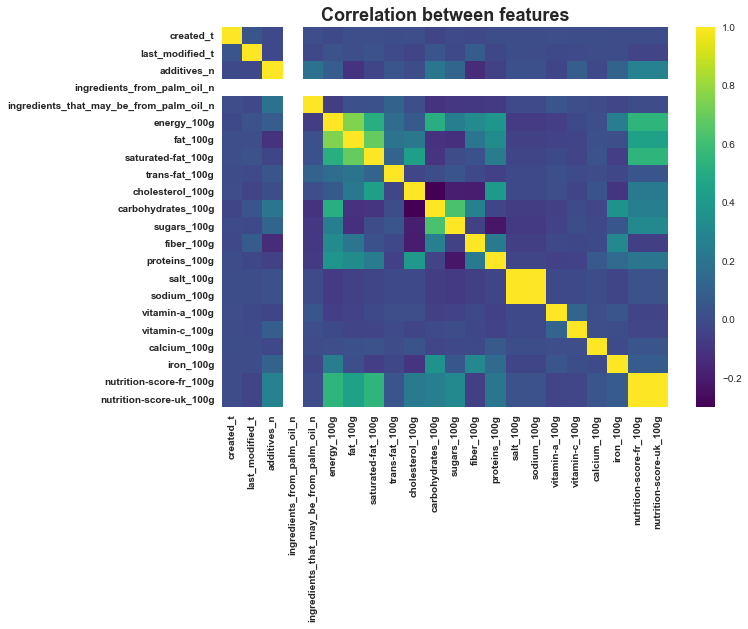

In [10]:
ac_corr=ac.corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(ac_corr, cmap='viridis')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()


From the correlation heatmap we can see a strong correlation between many features:

    Sugars and carbohydrates.
    Fat and saturated fat and energy
    Carbohydrates and energy
    Vitamin C and calcium
    Vitamin C and Vitamin a

And finally a strong correlation between the nutrition score (FR and UK) and sugars, fat, saturated fat and energy, which means that the scores are given based on the amounts of fat, calories and carbs in the product. Let's check the type of relation between the nutrition score and calories:


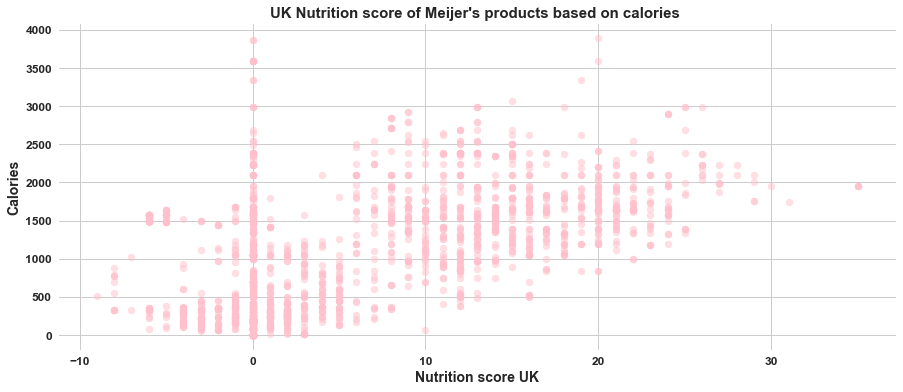

In [11]:
plt.figure(figsize=(15, 6))

plt.scatter(x=ac['nutrition-score-uk_100g'], y=ac['energy_100g'], color='pink', alpha=0.5)
plt.title("UK Nutrition score of Meijer's products based on calories ", 
          weight='bold', 
          fontsize=15)
plt.xlabel('Nutrition score UK', weight='bold', fontsize=14)
plt.ylabel('Calories', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.show()

We can see a pattern in this scatter plot, the more energy the product has, the higher score it gets. Many high calories products have a 0 nutrition score. We already dropped all the columns with more than 70% missing values, and filled the gap with 0s. Now let's keep just the features we are interested in:
We bascially keep 7 features:

In [12]:
ad=ac[['product_name','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g']]
print(f"we have {ad.shape[0]} products in Meijer supermarkets and {ad.shape[1]} features")

we have 1995 products in Meijer supermarkets and 7 features


 # Keto diet: Shopping guide in the Meijer supermarket

## Filtering Keto Products

In [13]:
keto= ad[(ad['energy_100g']<2000)&(ad['carbohydrates_100g']<40)&(ad['fat_100g']<165)&(ad['proteins_100g']<75)]
print(f'We have {keto.shape[0]} keto products in Meijer supermarkets')
keto

We have 1057 keto products in Meijer supermarkets


,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
31844,Organic Caesar Salad,536.0,10.33,1.63,7.61,1.09,2.72
31845,"Organic Garden Salad, Organic Ranch Dressing",452.0,7.77,0.97,7.77,2.91,1.94
40938,Chopped Mustard Greens,67.0,0.00,0.00,3.12,0.78,1.56
40939,Chopped Turnip Greens,50.0,0.00,0.00,3.12,0.00,0.78
40940,Chopped Kale,84.0,0.39,0.00,3.91,0.00,1.56
...,...,...,...,...,...,...,...
313861,Egg Salad On White Bread,975.0,8.81,1.81,29.02,2.59,8.29
313862,Swiss Cheese,1569.0,28.12,15.62,0.00,0.00,0.00
313863,Sliced Gouda Cheese,1464.0,25.00,17.50,0.00,0.00,25.00
314780,"Pitted Greek Kalamata Olives, Thrown",1117.0,26.67,3.33,6.67,0.00,0.00


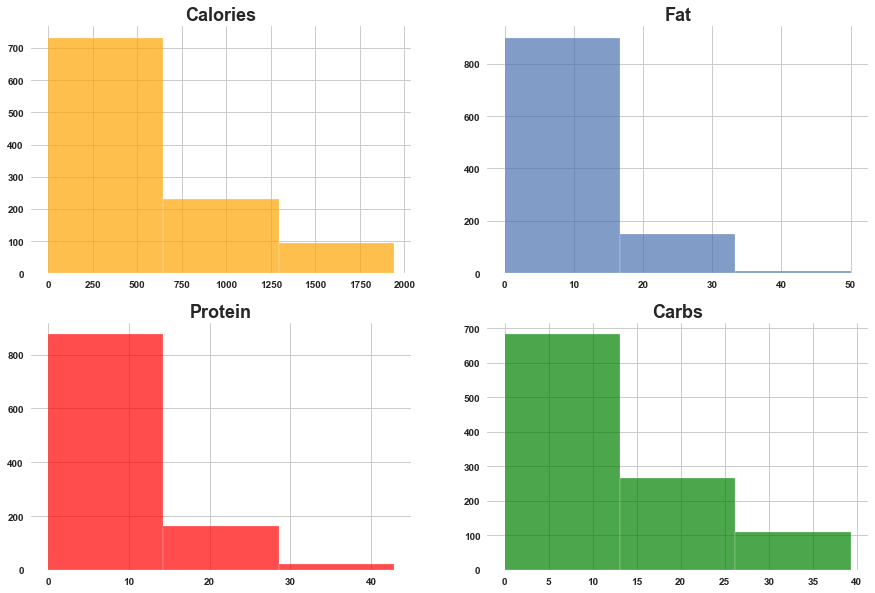

In [14]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

fig= plt.figure(figsize=(15,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.hist(keto.energy_100g, bins=3, color='orange', alpha=0.7)
plt.title('Calories',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.hist(keto.fat_100g, bins=3, alpha=0.7)
plt.title('Fat',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.hist(keto.proteins_100g, bins=3, color='red', alpha=0.7)
plt.title('Protein',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.hist(keto.carbohydrates_100g, bins=3, color='green', alpha=0.7)
plt.title('Carbs',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()

The distribution analysis:
1-Calories: The distribution of calories shows a higher frequency of calories in products falling within the range of 0-500 calories, which is a positive thing, since it gives many options for a meal plan.
2-Fat: Good for the keto diet: Most of the products fall within the range 0-17g, which is good to have fat in several meals.
3-Carbohydrates: Good for the keto diet: Most of the products have a lower amount of carbs (10g).
4-Proteins: Good for the keto diet: Most of the products fall within the range 0-13g of proteins.
Now, let's have a look over some keto products:

In [15]:
da=keto.sort_values(by=['energy_100g'],ascending=False).sample(5)
n = da.style.background_gradient(cmap='Purples')
n

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
41068,Seasoned Salt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
134923,"True Goodness, Organic Green Tea",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
130644,"Applesauce, Original",297.000000,0.000000,0.000000,17.460000,14.290000,0.000000
131292,"Soda, Root Beer",188.000000,0.000000,0.000000,12.680000,12.390000,0.000000
116731,Yellow Cling Peach Halves In Heavy Syrup,326.000000,0.000000,0.000000,17.190000,14.840000,0.780000


 ## Feature engineering

We will create new columns to label calories, fat, carbs and proteins, that will be used later in our meal plan choices. Let's create functions for our new label columns (calories, carbs, fat, calories) where we categorise them into: low, medium and high.

In [16]:
def label_cal (row):
   if row['energy_100g'] <= 250  :
      return 'low'
   if row['energy_100g'] > 250 and row['energy_100g'] <= 500 :
      return 'medium'
   if row['energy_100g'] > 500 :
      return 'high'
   
   return 'Other'


def label_fat (row):
   if row['fat_100g'] < 10 :
      return 'low'
   if row['fat_100g'] >= 10 and row['fat_100g'] < 20 :
      return 'medium'
   if row['fat_100g'] >= 20 :
      return 'high'
   
   return 'Other'


def label_pro (row):
   if row['proteins_100g'] < 10 :
      return 'low'
   if row['proteins_100g'] >= 10 and row['proteins_100g'] < 20 :
      return 'medium'
   if row['proteins_100g'] >= 20 :
      return 'high'
   
   return 'Other'


def label_carb (row):
   if row['carbohydrates_100g'] < 4 :
      return 'low'
   if row['carbohydrates_100g'] >= 4 and row['carbohydrates_100g'] < 12 :
      return 'medium'
   if row['carbohydrates_100g'] >= 12 :
      return 'high'
   
   return 'Other'

# we add those new columns to the existing keto dataset:
keto['calories'] = keto.apply (lambda row: label_cal(row), axis=1)

keto['fat'] = keto.apply (lambda row: label_fat(row), axis=1)

keto['protein'] = keto.apply (lambda row: label_pro(row), axis=1)

keto['carbs'] = keto.apply (lambda row: label_carb(row), axis=1)

#Create dataframe

db=keto.calories.value_counts().reset_index()
dd= keto.fat.value_counts().reset_index()
de=keto.protein.value_counts().reset_index()
dg=keto['carbs'].value_counts().reset_index()

#Merge them on the 'index' column:
merged=db.merge(dd,on='index').merge(de, on='index').merge(dg, on='index')
mergedstyle = merged.style.background_gradient(cmap='Blues')
mergedstyle

,index,calories,fat,protein,carbs
0,high,396,120,83,421
1,low,385,801,810,320
2,medium,276,136,164,316


## Keto products categories:

That would help us set our meal plan based on the calories, since a balanced diet requieres an average daily intake of 2000 calories, in the case of having 3 meals a day, it would be around 800 calories per meal, and in order to have a variated meal, there should be at least 3 components, each having a maximum of 250 calories.

Those are just estimations for the ideal products available in this supermarket that can be useful in a keto meal plan.

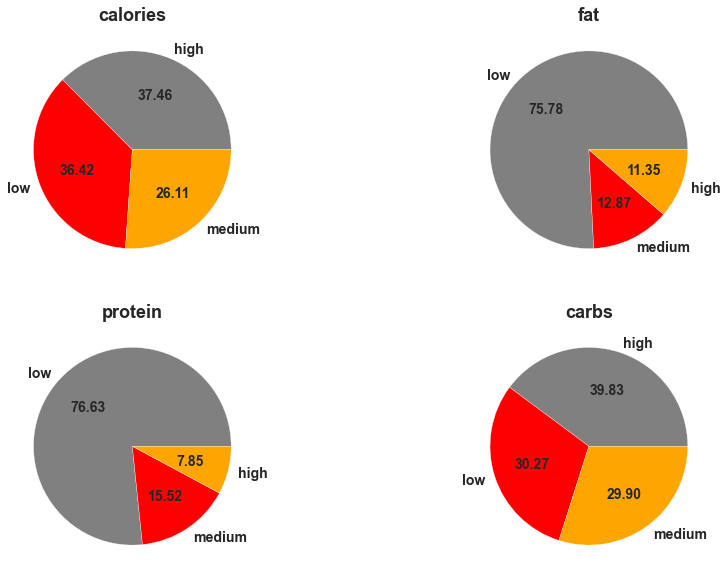

In [17]:
label1=db['index']
label2=dd['index']
label3=de['index']
label4=dg['index']


fig = plt.figure(figsize=(15,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(db.calories,colors=("grey","r","orange"),labels=label1, autopct='%.2f',textprops={'fontsize': 14, 'weight':'bold'})
plt.title('calories',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(dd.fat,colors=("grey","r","orange"),labels=label2, autopct='%.2f',textprops={'fontsize': 14, 'weight':'bold'})
plt.title('fat',weight='bold', fontsize=18)
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(de.protein,colors=("grey","r","orange"),labels=label3, autopct='%.2f',textprops={'fontsize': 14, 'weight':'bold'})
plt.title('protein',weight='bold', fontsize=18)
#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(dg.carbs,colors=("grey","r","orange"),labels=label4, autopct='%.2f',textprops={'fontsize': 14, 'weight':'bold'})
plt.title('carbs',weight='bold', fontsize=18)
plt.show()

In [18]:
ketocat=keto[['product_name', 'calories', 'protein','fat','carbs']]
keto_low=ketocat.loc[ketocat['calories']=='low']
keto_medium=ketocat.loc[ketocat['calories']=='medium']
keto_high=ketocat.loc[ketocat['calories']=='high']

## WordClouds of the keto products:

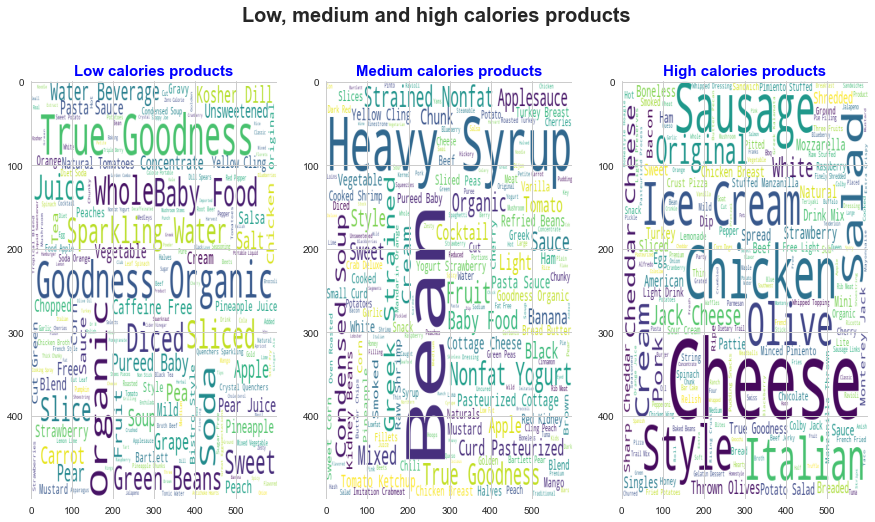

In [20]:
wordcloud1 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(keto_low['product_name']))
WordCloud.generate_from_frequencies


wordcloud2 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(keto_medium['product_name']))
WordCloud.generate_from_frequencies


wordcloud3 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(keto_high['product_name']))
WordCloud.generate_from_frequencies


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,8))

fig.suptitle('Low, medium and high calories products', weight='bold', fontsize=20)



ax1.set_title('Low calories products', weight='bold', fontsize=15, color='b')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(wordcloud1, aspect='auto')


ax2.set_title('Medium calories products', weight='bold', fontsize=15, color='b')
im4 = ax2.imshow(wordcloud2, aspect='auto')

ax3.set_title('High calories products', weight='bold', fontsize=15, color='b')
im4 = ax3.imshow(wordcloud3, aspect='auto')

# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

Here are some notes:

    Most of the products in this dataset are either French or American
    1057 out of 1995 products in Meijer supermarkets are suitable for a keto diet.
    Meijer has its own food brand: True goodness
    There are 385 low calories products in Meijer supermarkets. Main products: Vegetable, pureed baby, beens, water beverage, carrot, strawberry...
    There are 276 medium calories products in Meijer supermarkets. Main products: Beans, nonfat yogurt, pasta sauce, banana, tomato ketchup...
    There are 396 high calories products in Meijer supermarkets. Main products: Cheese,chicken, ice cream, cheddar, sausage....



# Machine Learning: Clustering

## Preprocessing

In [22]:
ketoc=keto[['energy_100g','fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'proteins_100g']]

In [23]:
from scipy.stats import skew

numeric_feats = ketoc.dtypes[ketoc.dtypes != "object"].index

skewed_feats = ketoc[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

ketoc[skewed_feats] = np.log1p(ketoc[skewed_feats])

In [24]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
scaler.fit(ketoc)

RobustScaler()

In [25]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import scipy.cluster.hierarchy as sch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\zhha8003\jupyter-env\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Before assigning clusters to our data, we start with a hierarchical cluster analysis. It is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

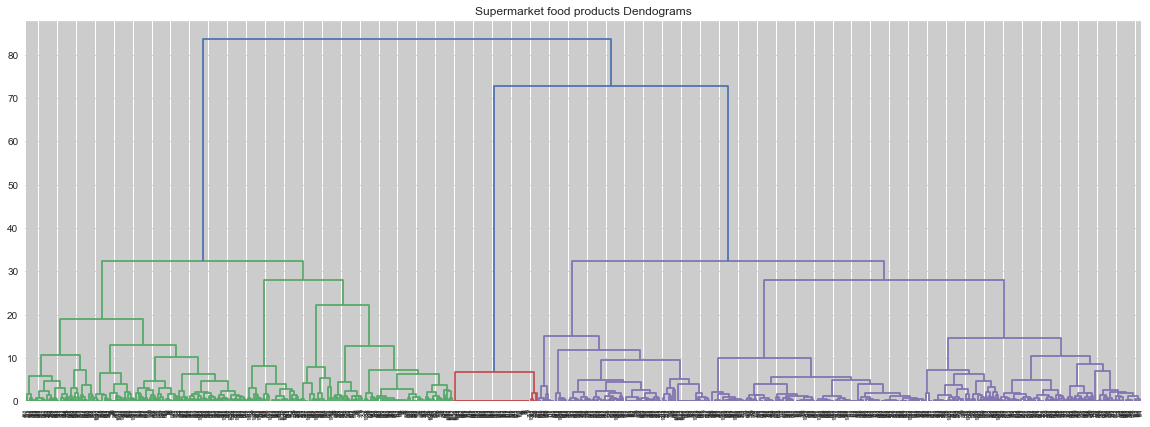

In [28]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))
plt.title("Supermarket food products Dendograms")
plt.xticks(rotation='vertical')


dend = shc.dendrogram(shc.linkage(ketoc, method='ward'))